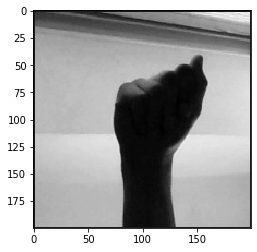

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cv2
from tqdm import tqdm
DATADIR = "/Users/ishan/Desktop/dataset/ASL/alfa_train"
CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q' ,'R' , 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
#CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array , cmap="gray")
            plt.show()
            break
        break

In [3]:
print(img_array.shape)

(200, 200)


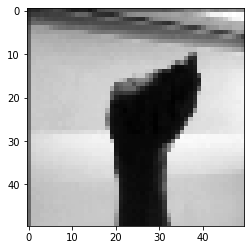

In [4]:
img_size = 50

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = 'gray')
#plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (img_size, img_size)) # resize to normalize data size
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                
create_training_data()

In [6]:
print(len(training_data))

87000


In [7]:
import random
random.shuffle(training_data)

In [8]:
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [9]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [12]:
X[300]

array([[[ 50],
        [ 68],
        [ 72],
        ...,
        [ 55],
        [ 60],
        [ 60]],

       [[ 85],
        [134],
        [125],
        ...,
        [ 71],
        [ 63],
        [ 59]],

       [[104],
        [180],
        [178],
        ...,
        [ 78],
        [ 79],
        [ 80]],

       ...,

       [[ 78],
        [ 90],
        [ 49],
        ...,
        [116],
        [117],
        [117]],

       [[ 33],
        [ 39],
        [ 39],
        ...,
        [117],
        [117],
        [116]],

       [[ 30],
        [ 19],
        [ 16],
        ...,
        [117],
        [117],
        [118]]], dtype=uint8)

In [11]:
print(X.shape)

(87000, 50, 50, 1)
